# Useful Imports 

In [2]:
import numpy as np, pandas as pd

import matplotlib.pyplot as plt

import cv2 #loads the opencv library

In [1]:
!pip install opencv-python

In [8]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [10]:
# plt.hist(np.random.randn(1000), bins = 100)

In [13]:
plt.rcParams.update({'font.size': 8})

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Let's Play with Images 😁 🤓

In [22]:
image_files  = 'car1.jpg'

img = cv2.imread(image_files)

In [23]:
type(img)

numpy.ndarray

In [24]:
img.shape
# The 3 stands for Red, Green and Blue channel (color image)

(1280, 1918, 3)

In [25]:
img[:,:,0].shape

(1280, 1918)

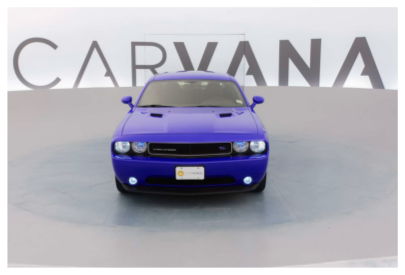

In [26]:
plt.figure(figsize=(7,7))

plt.imshow(img)

plt.axis(False)

plt.show()
# BGR as read by cv2

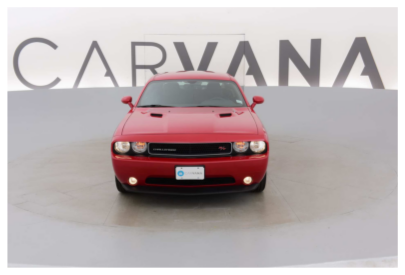

In [27]:
# Converts BGR to RGB

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(7,7))

plt.imshow(img)

plt.axis(False)

plt.show()


### lets play with channels

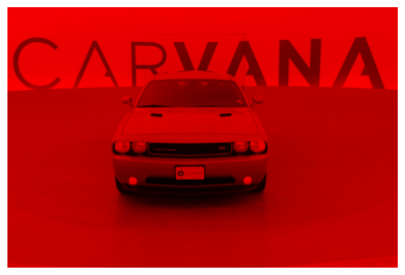

In [29]:
red_channel = np.copy(img)
red_channel[:,:,1] = 0
red_channel[:,:,2] = 0

plt.figure(figsize=(7,7))
plt.imshow(red_channel)
plt.axis(False)
plt.show()

In [31]:
red_channel[:,:,0]

array([[247, 247, 247, ..., 233, 233, 233],
       [247, 247, 247, ..., 233, 233, 233],
       [247, 247, 247, ..., 233, 233, 233],
       ...,
       [212, 211, 210, ..., 226, 226, 226],
       [212, 211, 210, ..., 228, 228, 228],
       [212, 211, 210, ..., 230, 230, 230]], dtype=uint8)

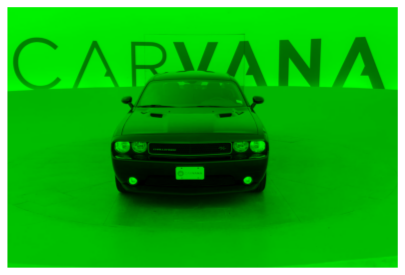

In [32]:
green_channel = np.copy(img)
green_channel[:, :, 0] = 0 # red
green_channel[:, :, 2] = 0 # blue
plt.figure(figsize=(7,7))
plt.imshow(green_channel)
plt.axis(False)
plt.show()

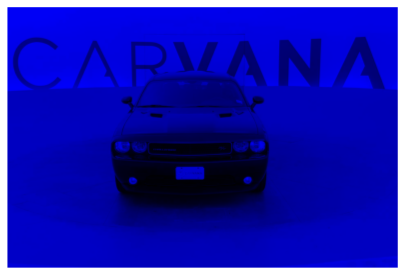

In [33]:
blue_channel = np.copy(img)
blue_channel[:, :, 0] = 0 # red
blue_channel[:, :, 1] = 0 # green
plt.figure(figsize=(7,7))
plt.imshow(blue_channel)
plt.axis(False)
plt.show()

### Converts RGB to GRAY

In [34]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [35]:
gray_img.shape

(1280, 1918)

In [37]:
img[0,0,0]

247

In [38]:
img[0,0,1]

242

In [39]:
img[0,0,2]

248

In [36]:
gray_img[0,0]

244

In [40]:
gray_img

array([[244, 244, 244, ..., 230, 230, 230],
       [244, 244, 244, ..., 230, 230, 230],
       [244, 244, 244, ..., 230, 230, 230],
       ...,
       [212, 211, 210, ..., 223, 223, 223],
       [212, 211, 210, ..., 225, 225, 225],
       [212, 211, 210, ..., 227, 227, 227]], dtype=uint8)

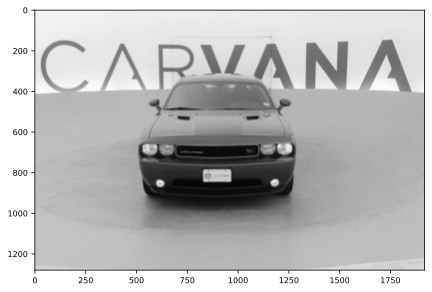

In [41]:
plt.figure(figsize=(7,7))

plt.imshow(gray_img, cmap = 'gray')

# plt.axis(False)

plt.show()

In [42]:
img.shape

(1280, 1918, 3)

In [43]:
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [44]:
img1.shape

(1280, 1918, 3)

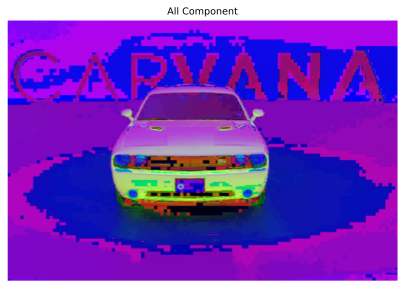

In [45]:
# All Component

plt.figure(figsize=(7,7))

plt.title('All Component')

plt.imshow(img1, cmap = 'hsv')

plt.axis(False)

plt.show()

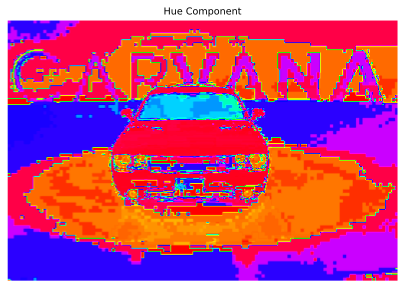

In [46]:
# Hue Component
plt.figure(figsize=(7,7))

plt.title('Hue Component')

plt.imshow(img1[:,:,0], cmap='hsv')

plt.axis(False)

plt.show()

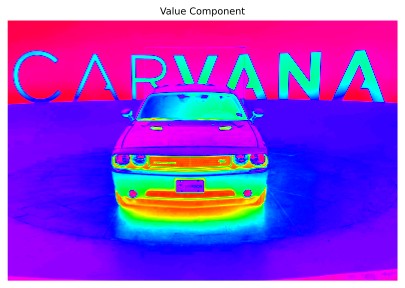

In [47]:
# Value Component
plt.figure(figsize=(7,7)) 

plt.title('Value Component')

plt.imshow(img1[:,:,2],cmap='hsv')
plt.axis(False)
plt.show()

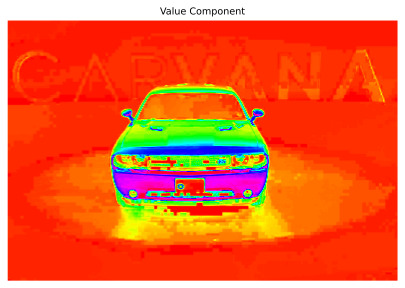

In [48]:
# Saturation Component
plt.figure(figsize=(7,7)) 

plt.title('Value Component')

plt.imshow(img1[:,:,1],cmap='hsv')
plt.axis(False)
plt.show()

## Bluring

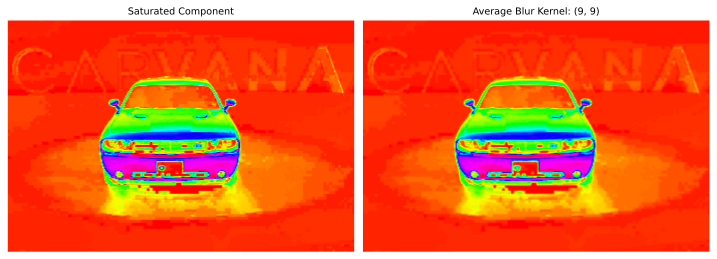

In [50]:
fig, ax = plt.subplots(1,2,figsize=(10,10))  

img2 = img1[:,:,1] #s component

kernel_size = (9,9)

# Applying Blurring
smoothen_img = cv2.blur(img2, kernel_size)

ax[0].set_title(f'Saturated Component') 
ax[0].imshow(img2, cmap='hsv')
ax[0].axis(False)


ax[1].set_title(f'Average Blur Kernel: {kernel_size}') 
ax[1].imshow(smoothen_img, cmap='hsv')
ax[1].axis(False)

plt.tight_layout()
plt.show()

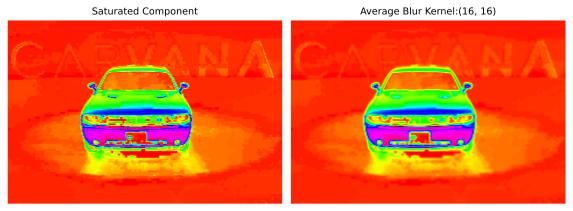

In [51]:
fig,ax = plt.subplots(1,2,figsize=(8,8))  
img2 = img1[:,:,1]
kernel_size = (16,16)

  # Applying Blurring
smoothen_img = cv2.blur(img2,kernel_size)

ax[0].set_title(f'Saturated Component') 
ax[0].imshow(img2,cmap='hsv')
ax[0].axis(False)
  
ax[1].set_title(f'Average Blur Kernel:{kernel_size}') 
ax[1].imshow(smoothen_img,cmap='hsv')
ax[1].axis(False)

plt.tight_layout()
plt.show()



In [ ]:
# smoothen_img

## Thresholding 

In [53]:
smoothen_img

array([[6, 6, 6, ..., 4, 4, 4],
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 6, ..., 4, 4, 4],
       ...,
       [2, 2, 2, ..., 5, 5, 5],
       [2, 2, 2, ..., 5, 5, 5],
       [1, 1, 1, ..., 5, 5, 5]], dtype=uint8)

In [54]:
smoothen_img.ravel()

array([6, 6, 6, ..., 5, 5, 5], dtype=uint8)

In [55]:
pd.value_counts(smoothen_img.ravel())

7      394453
8      359205
4      246890
6      216796
5      129861
        ...  
243       230
242       227
251       130
252        83
253         9
Length: 254, dtype: int64

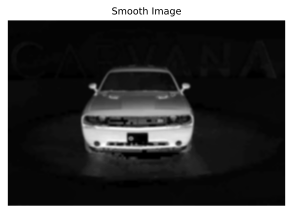

In [56]:
# plotting on grayscale
plt.figure(figsize=(5,5)) 

plt.title('Smooth Image')
plt.imshow(smoothen_img, cmap="gray")
plt.axis(False)
plt.show()

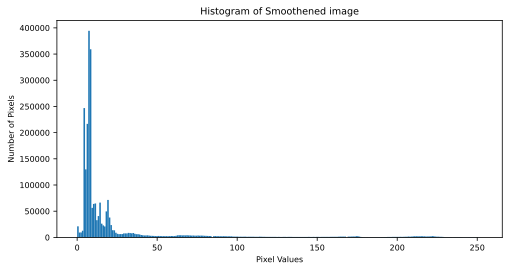

In [57]:
plt.figure(figsize=(8,4))

plt.hist(smoothen_img.ravel(), bins=256)

plt.title('Histogram of Smoothened image')
plt.ylabel('Number of Pixels')
plt.xlabel('Pixel Values')
plt.savefig('histogram')
plt.show()

In [58]:
_,thresh_img = cv2.threshold(smoothen_img, 30, 255, cv2.THRESH_BINARY)

In [59]:
thresh_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [60]:
pd.value_counts(thresh_img.ravel())

0      2053989
255     401051
dtype: int64

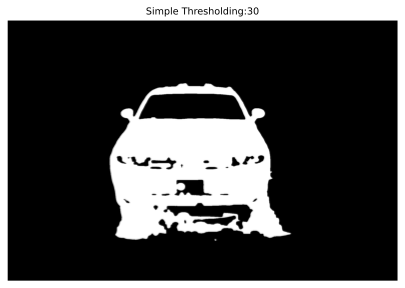

In [61]:
_,thresh_img = cv2.threshold(smoothen_img,30,255,cv2.THRESH_BINARY)

plt.figure(figsize=(7,7))

plt.title(f'Simple Thresholding:{30}')
    
# Simple Thresholding

plt.imshow(thresh_img, cmap='gray')

plt.axis(False)

plt.show()

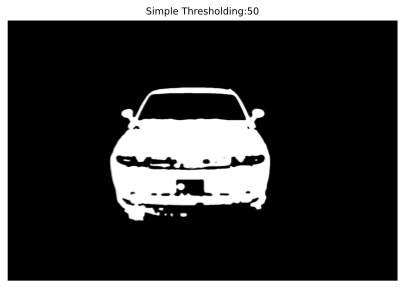

In [65]:
_,thresh_img = cv2.threshold(smoothen_img,50,255,cv2.THRESH_BINARY)

plt.figure(figsize=(7,7))

plt.title(f'Simple Thresholding:{50}')
    
# Simple Thresholding

plt.imshow(thresh_img, cmap='gray')

plt.axis(False)

plt.show()

## Dilation and Erosion

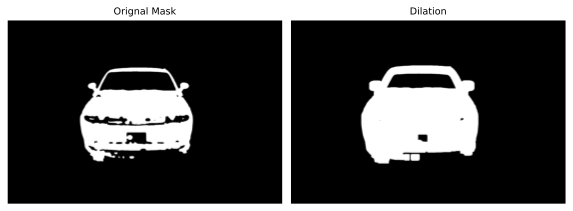

In [67]:
fig,ax = plt.subplots(1,2,figsize=(8,4)) 

dilate = cv2.dilate(thresh_img, None, iterations = 15)

ax[0].set_title(f'Orignal Mask')
ax[1].set_title(f'Dilation')

ax[0].imshow(thresh_img, cmap='gray')
ax[0].axis(False)

#Dilation
ax[1].imshow(dilate, cmap='gray')
ax[1].axis(False)
 
plt.tight_layout()
plt.show()

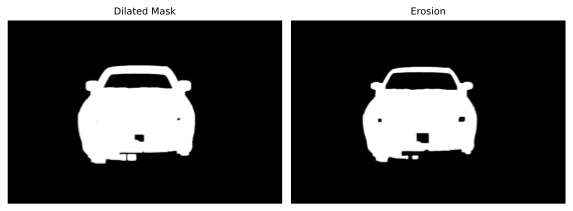

In [68]:
fig,ax = plt.subplots(1,2,figsize=(8,4)) 


erode = cv2.erode(dilate,None,iterations= 10)

ax[0].set_title(f'Dilated Mask')
ax[1].set_title(f'Erosion')

# dilate
ax[0].imshow(dilate,cmap='gray')
ax[0].axis(False)

#Erosion
ax[1].imshow(erode,cmap='gray')
ax[1].axis(False)
 
plt.tight_layout()
plt.show()

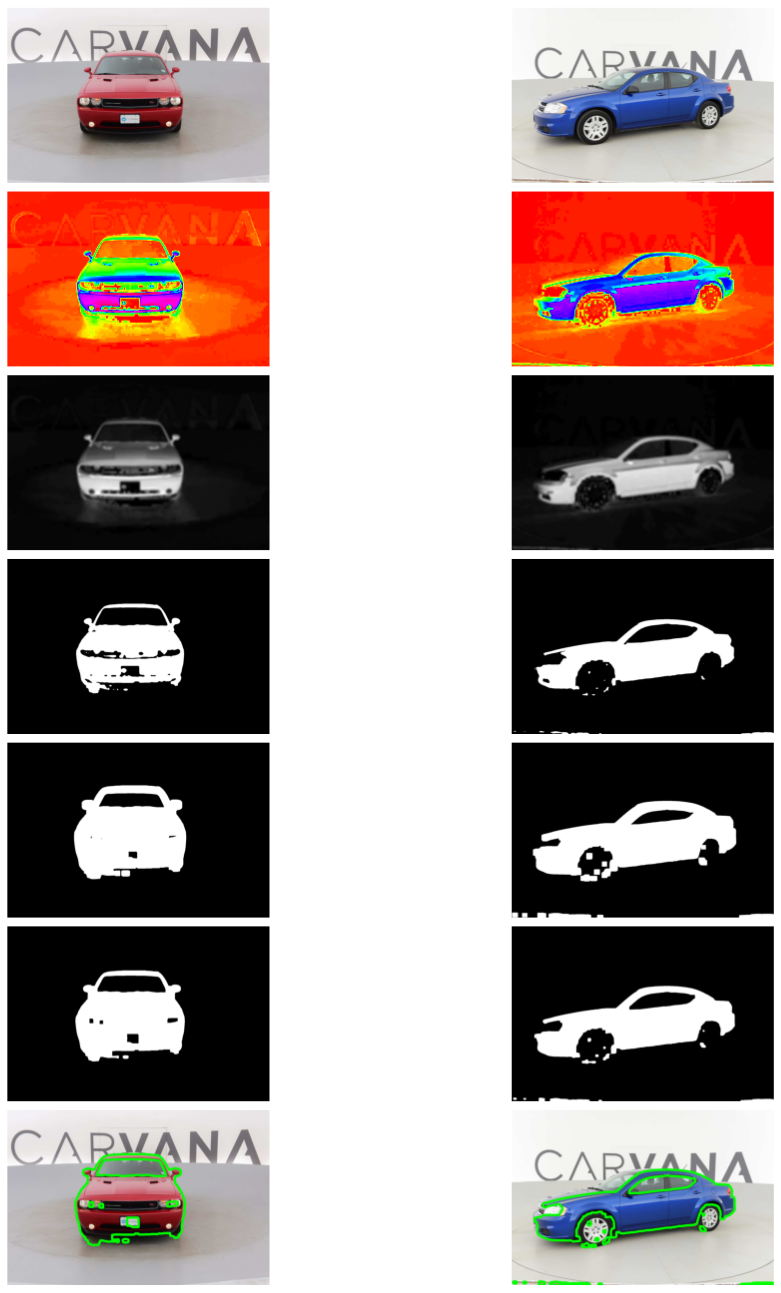

In [69]:
fig,ax = plt.subplots(7,2,figsize=(18,18)) 
image_files  = ['car1.jpg','car3.jpg']

for idx,files in enumerate(image_files):
    
  img = cv2.imread(files)
  org_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
  img = cv2.cvtColor(org_img,cv2.COLOR_RGB2HSV)
  
  img = img[:,:,1]

  blurred_img = cv2.blur(img,(20,20))
  
  _,thresh_img = cv2.threshold(blurred_img,50,255,cv2.THRESH_BINARY)
  
  dilated = cv2.dilate(thresh_img,None,iterations= 15)
  eroded = cv2.erode(dilated,None,iterations= 10)
  
  contours,_ = cv2.findContours(eroded, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) 
  #cv2.RETR_LIST – retrieves all of the contours
  #cv2.CHAIN_APPROX_NONE – stores all the contour points

  final_img = cv2.drawContours(org_img.copy(),contours, -1, (0,255,0), 15)
  

  ax[0,idx].imshow(org_img)
  ax[0,idx].axis(False) 


  ax[1,idx].imshow(img,cmap='hsv')
  ax[1,idx].axis(False) 


  ax[2,idx].imshow(blurred_img,cmap='gray')
  ax[2,idx].axis(False)


  ax[3,idx].imshow(thresh_img,cmap='gray')
  ax[3,idx].axis(False)


  ax[4,idx].imshow(dilated,cmap='gray')
  ax[4,idx].axis(False)


  ax[5,idx].imshow(eroded,cmap='gray')
  ax[5,idx].axis(False)


  ax[6,idx].imshow(final_img)
  ax[6,idx].axis(False)   

plt.tight_layout()
plt.show()


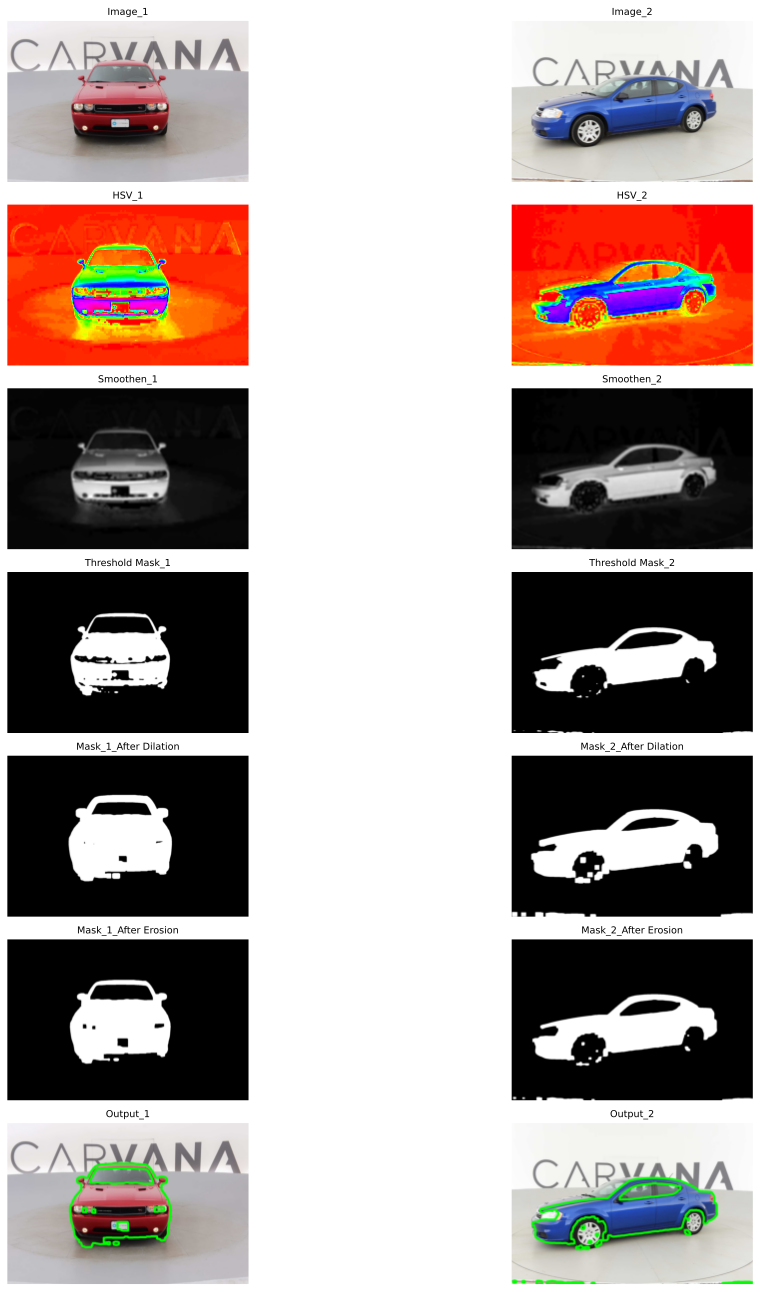

In [70]:
fig,ax = plt.subplots(7,2,figsize=(18,18)) 
image_files  = ['car1.jpg','car3.jpg']

for idx,files in enumerate(image_files):
  img = cv2.imread(files)
  org_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
  img = cv2.cvtColor(org_img,cv2.COLOR_RGB2HSV)
  
  img = img[:,:,1]

  blurred_img = cv2.blur(img,(20,20))
  
  _,thresh_img = cv2.threshold(blurred_img,50,255,cv2.THRESH_BINARY)
  
  dilated = cv2.dilate(thresh_img,None,iterations= 15)
  eroded = cv2.erode(dilated,None,iterations= 10)
  
  contours,_ = cv2.findContours(eroded, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) 
  #cv2.RETR_LIST – retrieves all of the contours
  #cv2.CHAIN_APPROX_NONE – stores all the contour points

  final_img = cv2.drawContours(org_img.copy(),contours, -1, (0,255,0), 15)
  
  ax[0,idx].set_title(f'Image_{idx+1}')
  ax[0,idx].imshow(org_img)
  ax[0,idx].axis(False) 

  ax[1,idx].set_title(f'HSV_{idx+1}')
  ax[1,idx].imshow(img,cmap='hsv')
  ax[1,idx].axis(False) 

  ax[2,idx].set_title(f'Smoothen_{idx+1}')
  ax[2,idx].imshow(blurred_img,cmap='gray')
  ax[2,idx].axis(False)

  ax[3,idx].set_title(f'Threshold Mask_{idx+1}')
  ax[3,idx].imshow(thresh_img,cmap='gray')
  ax[3,idx].axis(False)

  ax[4,idx].set_title(f'Mask_{idx+1}_After Dilation')
  ax[4,idx].imshow(dilated,cmap='gray')
  ax[4,idx].axis(False)

  ax[5,idx].set_title(f'Mask_{idx+1}_After Erosion')
  ax[5,idx].imshow(eroded,cmap='gray')
  ax[5,idx].axis(False)

  ax[6,idx].set_title(f'Output_{idx+1}')
  ax[6,idx].imshow(final_img)
  ax[6,idx].axis(False)   

plt.tight_layout()
plt.show()
